# K Nearest Neighbors 
By Dev Patel

In this KNN-classification project, given a classified dataset from a company, I will predict the class for a new data point based on its features. In the dataset the features' column names are hidden, but the data and the target class is given.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Getting the Data**

In [2]:
# Extracting the data from the csv file

df = pd.read_csv('KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


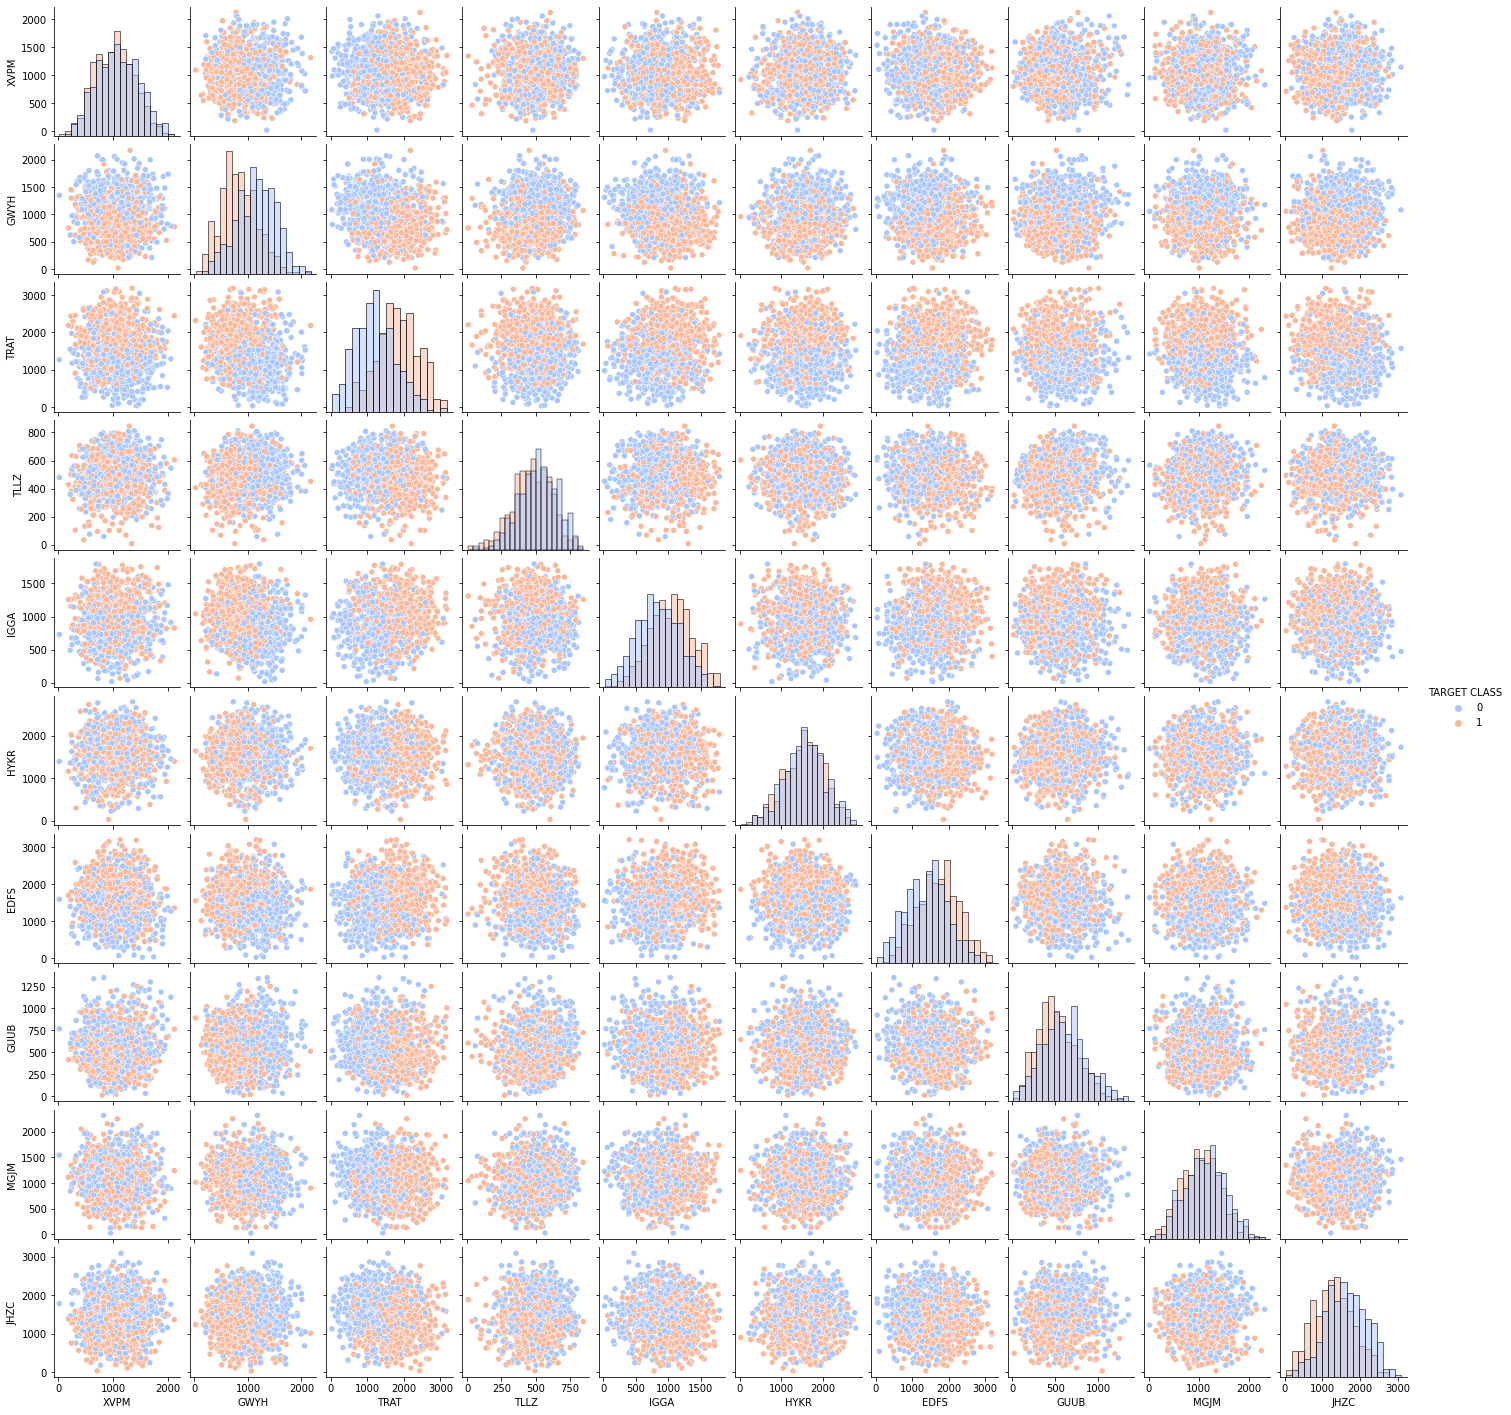

In [5]:
# Pairplot for the df with hue based on Target Class

sns.pairplot(df, hue='TARGET CLASS', palette='coolwarm', diag_kind='hist', height=2)

**Standardizing the Variables**

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Creating an instance of StandardScaler

scaler = StandardScaler()

In [9]:
# Fitting the scaler of the features of df

scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [10]:
# Transforming the features to a scaled version

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [11]:
# Creating a dataframe to store the scaled features

df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


**Train Test Split**

In [13]:
# Splitting the data into training and testing data

from sklearn.model_selection import train_test_split

X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**KNN Model with K=1**

In [14]:
# Creating a KNN model 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
# Predicting from the model

predictions = knn.predict(X_test)

In [18]:
# Evaluating the model

from sklearn import metrics
print('Confusion Matrix:', '\n', metrics.confusion_matrix(y_test, predictions), '\n')
print('Classification Report:', '\n', metrics.classification_report(y_test,predictions))

Confusion Matrix: 
 [[109  43]
 [ 41 107]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



**Choosing a better K-value using the elbow method**

In [19]:
# Creating a for loop that trains various KNN models with different K-values
# and then storing the error_rate for each of these models in a list

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

In [21]:
sns.set_style('whitegrid')

Text(0, 0.5, 'Error Rate')

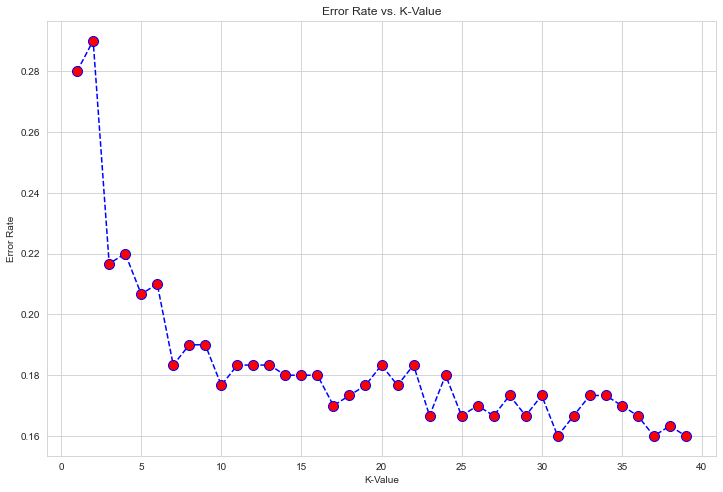

In [30]:
# Plotting the Error Rate vs the K-value for all the above trained models

plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

**Retraining the KNN model with K=31**

In [31]:
# Creating the new KNN model 

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [32]:
# Predicting from the model

predictions = knn.predict(X_test)

In [33]:
# Evaluating the model

from sklearn import metrics
print('Confusion Matrix:', '\n', metrics.confusion_matrix(y_test, predictions), '\n')
print('Classification Report:', '\n', metrics.classification_report(y_test,predictions))

Confusion Matrix: 
 [[124  28]
 [ 24 124]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In Conclusion, choosing a new K-value resulted in almost a 10% increase in Accuracy, Precision, as well as recall.